# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observational Trends
1. In the latitude verse max temperature scatter plot there seems to be a pattern of increasing temperatures between 0 and 20 latitude which is right around the equator and then the temperatures seem to decrease when the latitude is larger than 20 degrees.
2. For the general scatter plot between the latitude and cloudiness, the data points were randomly distributed and there does not seem to be any kind of relationship between the two, and there is more evidence pointing to that infrence seen on the scatterplot for the southern hemisphere's cloudiness and linear regression model.
3. Another interesting trend is that the Southern Hemisphere seems to have weaker relationships with the latitude linear regressions for humidity, cloudiness, and wind speed whereas the Northern Hemisphere seems to have a bit more stronger relationships between the latiude linear regressions and its humidity, cloudiness, and wind speeds.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import random # importing random list of latitudes and longitudes

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url for the weathermap along with the api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# From day 3 notes
# find the closest restaurant of each type to coordinates

# set up lists to hold reponse info
name_city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Starting the call count for the city
record=1

# Starting the count of sets
sets=1

# Loop through the list of cities and perform a request for data on each city
print(f"Beginning Data Retrieval.")
print(f"--------------------------------")

for city in cities:
    
    if record % 50 == 0: 
        sets = sets + 1
        record = 1
    
    try:
        weatherpy_data = requests.get(f" {url}&q={city}").json()
        name_city.append(weatherpy_data['name'])
        cloudiness.append(weatherpy_data['clouds']['all'])
        country.append(weatherpy_data['sys']['country'])
        date.append(weatherpy_data['dt'])
        humidity.append(weatherpy_data['main']['humidity'])
        lat.append(weatherpy_data['coord']['lat'])
        lng.append(weatherpy_data['coord']['lon'])
        max_temp.append(weatherpy_data['main']['temp_max'])
        wind_speed.append(weatherpy_data['wind']['speed'])
        
        print(f"Prosessing record {record} of Set {sets}| {city}")
        
        record = record + 1
        
        
        # Not exceeding the API request per minute
        time.sleep(1.01)
            
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    

Beginning Data Retrieval.
--------------------------------
Prosessing record 1 of Set 1| arraial do cabo
Prosessing record 2 of Set 1| sarangani
Prosessing record 3 of Set 1| praia da vitoria
Prosessing record 4 of Set 1| ketchikan
Prosessing record 5 of Set 1| laguna
Prosessing record 6 of Set 1| victoria
Prosessing record 7 of Set 1| provideniya
Prosessing record 8 of Set 1| nelson bay
Prosessing record 9 of Set 1| tiksi
Prosessing record 10 of Set 1| tilichiki
Prosessing record 11 of Set 1| katsuura
Prosessing record 12 of Set 1| ferkessedougou
Prosessing record 13 of Set 1| bandarbeyla
Prosessing record 14 of Set 1| beira
Prosessing record 15 of Set 1| ushuaia
Prosessing record 16 of Set 1| miri
Prosessing record 17 of Set 1| huinan
Prosessing record 18 of Set 1| albany
Prosessing record 19 of Set 1| sitka
Prosessing record 20 of Set 1| bluff
Prosessing record 21 of Set 1| mar del plata
Prosessing record 22 of Set 1| nargana
Prosessing record 23 of Set 1| kodiak
Prosessing record 2

Prosessing record 45 of Set 4| korla
Prosessing record 46 of Set 4| bambous virieux
Prosessing record 47 of Set 4| tenenkou
Prosessing record 48 of Set 4| husavik
Prosessing record 49 of Set 4| kuytun
Prosessing record 1 of Set 5| krasnoselkup
Prosessing record 2 of Set 5| tasiilaq
Prosessing record 3 of Set 5| raymondville
Prosessing record 4 of Set 5| thompson
Prosessing record 5 of Set 5| chuy
Prosessing record 6 of Set 5| khudumelapye
Prosessing record 7 of Set 5| zhicheng
Prosessing record 8 of Set 5| maniitsoq
Prosessing record 9 of Set 5| port alfred
Prosessing record 10 of Set 5| qaanaaq
Prosessing record 11 of Set 5| itaguai
Prosessing record 12 of Set 5| sayat
Prosessing record 13 of Set 5| kuala terengganu
City not found. Skipping...
City not found. Skipping...
Prosessing record 14 of Set 5| makokou
Prosessing record 15 of Set 5| verkh-chebula
Prosessing record 16 of Set 5| kuvshinovo
Prosessing record 17 of Set 5| daura
Prosessing record 18 of Set 5| uray
Prosessing record 

Prosessing record 39 of Set 8| altamont
Prosessing record 40 of Set 8| inirida
Prosessing record 41 of Set 8| dhidhdhoo
City not found. Skipping...
Prosessing record 42 of Set 8| miandoab
Prosessing record 43 of Set 8| arona
Prosessing record 44 of Set 8| najran
Prosessing record 45 of Set 8| cherdyn
Prosessing record 46 of Set 8| kailua
Prosessing record 47 of Set 8| acapulco
Prosessing record 48 of Set 8| pekan


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create the Dictionary and columns
weather_city_list = {"City": name_city,
                    "Country": country,
                    "Cloudiness": cloudiness,
                    "Date": date,
                    "Humidity": humidity,
                    "Latitude": lat,
                    "Longitude": lng,
                    "Max Temp": max_temp,
                    "Wind Speed": wind_speed}

# Creating the DataFrame from the dictionary
weatherpy_city_data_df = pd.DataFrame(weather_city_list)

In [8]:
# Saving the city data to csv
weatherpy_city_data_df.to_csv("output_data/weatherpy_city_data_df.csv")

# Displaying Dataframe
weatherpy_city_data_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Arraial do Cabo,20,BR,1619361067,78,-22.9661,-42.0278,80.60,2.30
1,Sarangani,2,PH,1619361196,78,5.4033,125.4636,83.21,15.86
2,Praia da Vitória,40,PT,1619361197,72,38.7333,-27.0667,64.99,17.34
3,Ketchikan,1,US,1619361199,70,55.3422,-131.6461,37.40,4.85
4,Laguna,1,US,1619361200,71,38.4210,-121.4238,54.00,5.75
...,...,...,...,...,...,...,...,...,...
72,Bredasdorp,100,ZA,1619361281,77,-34.5322,20.0403,62.60,2.30
73,Busselton,2,AU,1619361013,91,-33.6500,115.3333,60.01,4.45
74,Aklavik,40,CA,1619361284,86,68.2191,-135.0107,19.40,9.22
75,The Valley,40,AI,1619361285,65,18.2170,-63.0578,84.20,14.97


In [9]:
weatherpy_city_data_df.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000
mean,52.116883,1.619361e+09,70.207792,17.189361,20.891732,55.495584,9.196494
std,39.528462,1.473702e+02,22.498735,40.198968,102.542896,22.789108,5.592081
min,0.000000,1.619361e+09,9.000000,-54.800000,-175.200000,0.880000,1.140000
25%,11.000000,1.619361e+09,62.000000,-21.480300,-63.057800,39.200000,4.850000
50%,42.000000,1.619361e+09,74.000000,28.017000,19.916700,57.990000,9.170000
75%,98.000000,1.619361e+09,86.000000,48.000000,121.900000,73.400000,11.500000
max,100.000000,1.619361e+09,100.000000,78.218600,169.846400,103.820000,25.320000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

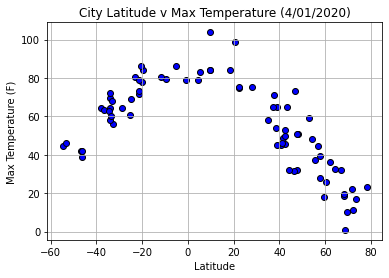

In [20]:
plt.scatter(weatherpy_city_data_df["Latitude"], weatherpy_city_data_df["Max Temp"], marker="o", 
            facecolors="blue", edgecolors="black")

# Labeling the graph
plt.title("City Latitude v Max Temperature (4/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set a grid on the plot
plt.grid()

# Saving fig as png
plt.savefig("output_data/latitude_vs_maxtemp_plot.png")
          
plt.show()

The graph above shows a correlation relationship between the city's latitude and the max temperature of each city. What 
this plot is demonstrating is a possible linear relationship between the latitude of the cities and the highest temperatures
documented in the cities. 

## Latitude vs. Humidity Plot

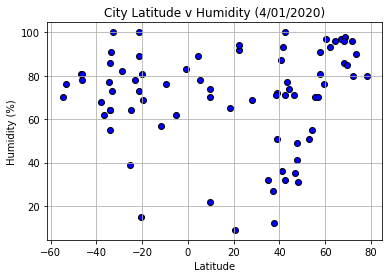

In [21]:
plt.scatter(weatherpy_city_data_df["Latitude"], weatherpy_city_data_df["Humidity"], marker="o", 
            facecolors="blue", edgecolors="black")

# Labeling the graph
plt.title("City Latitude v Humidity (4/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set a grid on the plot
plt.grid()

# Saving fig as png
plt.savefig("output_data/latitude_vs_humidity_plot.png")
          
plt.show()

The plot above is of the cities' latitude and the humidity documented for each city. This plot does not seem to shocase any sort of linear relationship or correlation between latitude and humity within the cities due to the. wide distrubition of the data points; however, there seems to be a cluster of humidity documentation above 50%.

## Latitude vs. Cloudiness Plot

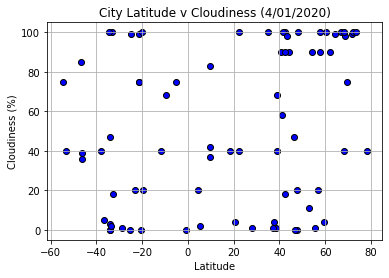

In [22]:
plt.scatter(weatherpy_city_data_df["Latitude"], weatherpy_city_data_df["Cloudiness"], marker="o", 
            facecolors="blue", edgecolors="black")

# Labeling the graph
plt.title("City Latitude v Cloudiness (4/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set a grid on the plot
plt.grid()

# Saving fig as png
plt.savefig("output_data/latitude_vs_cloudiness_plot.png")
          
plt.show()

The plot sbove is of the latitudes and the cloudiness percentages of the cities randomly sampled. The data points are 
spread out randomly throughout the plot and does not seem to have a linear relationship, but there seems to be a cluster of 
data points around the cloudiness percentages of 0, 40, and 100.

## Latitude vs. Wind Speed Plot

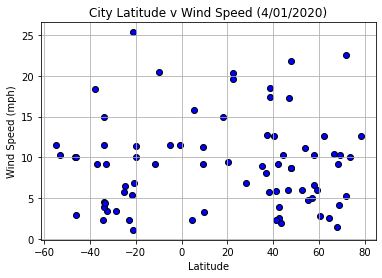

In [23]:
plt.scatter(weatherpy_city_data_df["Latitude"], weatherpy_city_data_df["Wind Speed"], marker="o", 
            facecolors="blue", edgecolors="black")

# Labeling the graph
plt.title("City Latitude v Wind Speed (4/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set a grid on the plot
plt.grid()

# Saving fig as png
plt.savefig("output_data/latitude_vs_windspeed_plot.png")
          
plt.show()

The plot above is above of of the latitudes and the wind speeds in mph of the cities. Although there does not seem to be a 
linear relationship between these variables, there is a cluster of data points observed for wind speeds below 15 mph with a few above 15 mph.

## Linear Regression

In [24]:
# Creating Northern Hemisphere >= 0 and Southern Hemisphere <0 dataframes 
north_hem = weatherpy_city_data_df.loc[weatherpy_city_data_df["Latitude"] >= 0]

south_hem = weatherpy_city_data_df.loc[weatherpy_city_data_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8135044569747353


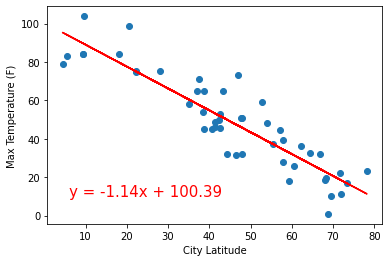

In [26]:
x_values = north_hem['Latitude']
y_values = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: -{rvalue**2}")

# Saving fig as png
plt.savefig("output_data/north_hem_maxtemp_vs_latitude_LR.png")
          
plt.show()

The graph above shows a linear regression plot of the northern hemisphere's city latitudes and the max temperatures. There is
a downward slope between these varibles and given the negative correlation correffcient of 0.81, there is a negative linear
relationship betweent the latitudes and max temperatures of the cities.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.765116739636812
y = 0.9x + 92.72


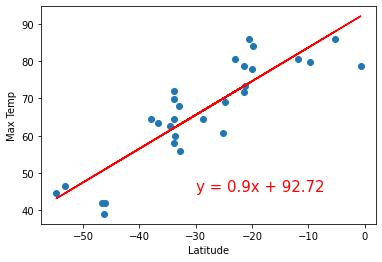

In [37]:
x_values = south_hem['Latitude']
y_values = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

# Saving fig as png
plt.savefig("output_data/south_hem_maxtemp_vs_latitude_LR.png")
          
plt.show()

This figure above is a scatter plot of the southern hemisphere max temperature and latitude. Due to the upward slope of the
regression line and given the positive correlation coeffcient of 0.77, this is a fairly strong and positive linear relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11734777560859139


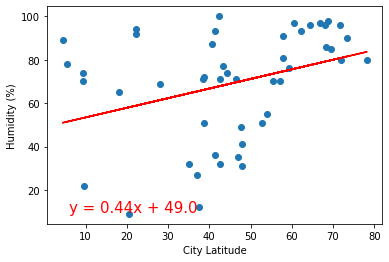

In [36]:
x_values = north_hem['Latitude']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")

# Saving fig as png
plt.savefig("output_data/north_hem_humidity_vs_latitude_LR.png")
          
plt.show()

The figure above is of the northern hemisphere's latitude and humidity variables. The slope of the regression line is 
slightly upward and given that the correlation coeffecient is 0.1 and positive, there is a slight or very small positive linear 
relationship between these variables.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.014591772853055966
y = -0.16x + 67.67


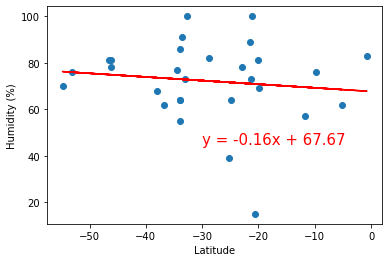

In [39]:
x_values = south_hem['Latitude']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: -{rvalue**2}")
print(line_eq)

# Saving fig as png
plt.savefig("output_data/south_hem_humidity_vs_latitude_LR.png")
          
plt.show()

The figure above is of the southern hemisphere cities' humidity percentages and latitudes. There seems to be a very weak negative relationship between these varibales given the negative and very small correlation coefficient of -0.01.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12942282866922933


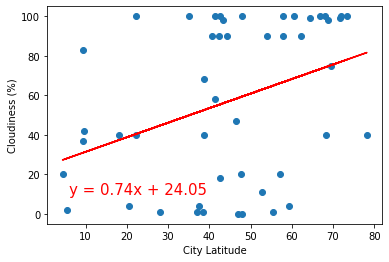

In [40]:
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

# Saving fig as png
plt.savefig("output_data/north_hem_cloudiness_vs_latitude_LR.png")
          
plt.show()

The figure above is of the northern hemisphere's cloudiness percentages and city latitudes. The data points seem to be spread out, however the regression line's slope is upwards which means that there is a moderate positive relationship between the variables, since the correlation coeffcient is 0.13 which is positive.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 6.920548723678334e-05
y = 0.02x + 44.2


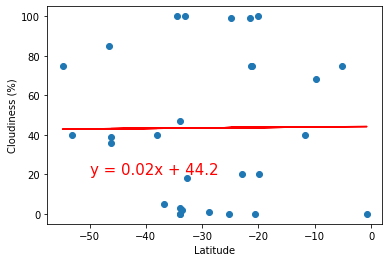

In [44]:
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

# Saving fig as png
plt.savefig("output_data/south_hem_cloudiness_vs_latitude_LR.png")
          
plt.show()

The figure above shows a southern hemisphere's cloudiness percentages and latitudes. Since the data points are randomly distributed throughout the plot,and the correlation coefficient is above 1, there is no relationship between these two variables.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.015436398582591684


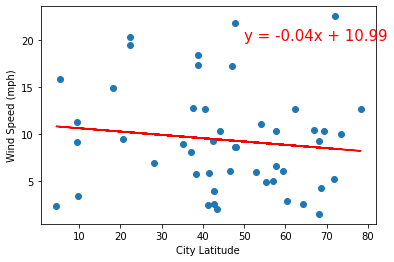

In [47]:
x_values = north_hem['Latitude']
y_values = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: -{rvalue**2}")

# Saving fig as png
plt.savefig("output_data/north_hem_wind_speed_vs_latitude_LR.png")
          
plt.show()

The figure above includes the northern hemisphere's wind speeds and latitudes. There is a slight negative relationship but it is weak due to the wide random distruction of the data points.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.020875476245866133
y = 0.06x + 10.69


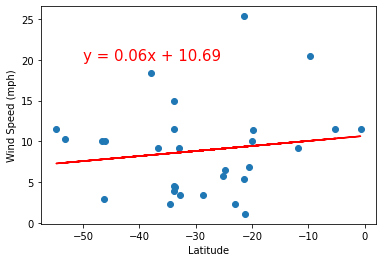

In [48]:
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

# Saving fig as png
plt.savefig("output_data/south_hem_wind_speed_vs_latitude_LR.png")
          
plt.show()

The figure above is of the southern hemisphere's wind speeds and latitudes. The relationship is positive but very weak given the correlation coefficient of 0.02 and the random distrubution of the data points.